<a href="https://colab.research.google.com/github/mohammadsanaee/Timeseries-Forecasting/blob/main/Mohammad_Market_data_from_Apple!_Finance's_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [359]:
%%capture
%pip install statsforecast -U

In [360]:

from statsforecast import StatsForecast
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
os.environ['NIXTLA_ID_AS_COL'] = '1'

In [361]:
from yfinance import Ticker

goog = Ticker('AAPL').history(period="2y", auto_adjust=True)
goog

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-05-11 00:00:00-04:00,151.782774,153.710956,144.178801,144.861084,142689800,0.00,0.0
2022-05-12 00:00:00-04:00,141.172822,144.564443,137.247233,140.965164,182602000,0.00,0.0
2022-05-13 00:00:00-04:00,142.972466,146.443209,141.509027,145.464279,113990900,0.00,0.0
2022-05-16 00:00:00-04:00,143.921717,145.869680,142.567033,143.911819,86643800,0.00,0.0
2022-05-17 00:00:00-04:00,147.194696,148.094519,145.039076,147.570450,78336300,0.00,0.0
...,...,...,...,...,...,...,...
2024-05-06 00:00:00-04:00,182.103015,183.950500,180.175621,181.463882,78569700,0.00,0.0
2024-05-07 00:00:00-04:00,183.201504,184.649537,181.074400,182.152924,77305800,0.00,0.0
2024-05-08 00:00:00-04:00,182.602329,182.822032,181.204216,182.492477,45057100,0.00,0.0


In [362]:
df = pd.DataFrame({'unique_id': 'AAPL', 'ds': goog.index.tz_localize(None), 'y': goog.Close.values})
df = df[(df.ds >= pd.to_datetime('2023-05-01')) & (df.ds <= pd.to_datetime('2024-05-12')) ]
df.ds = range(df.shape[0])
df.tail()

,unique_id,ds,y
498,AAPL,255,181.463882
499,AAPL,256,182.152924
500,AAPL,257,182.492477
501,AAPL,258,184.320007
502,AAPL,259,183.050003


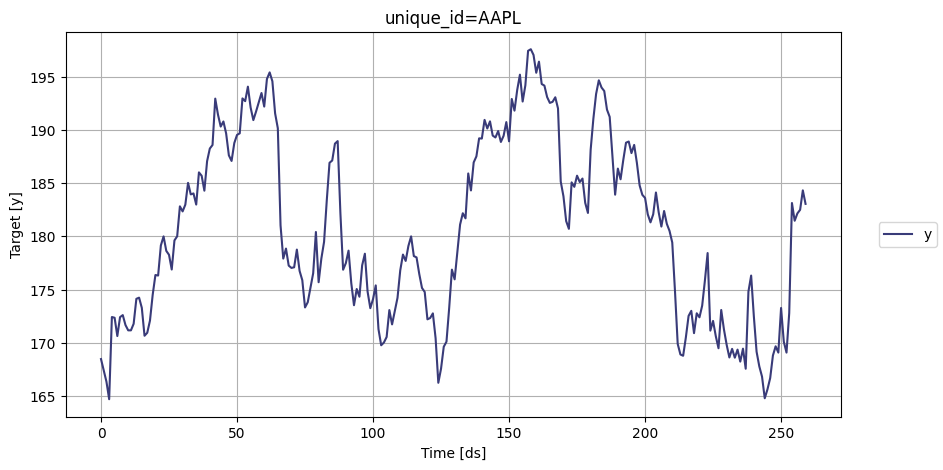

In [363]:
f = StatsForecast.plot(df)
f.set_figwidth(10)
f.set_figheight(5)
f

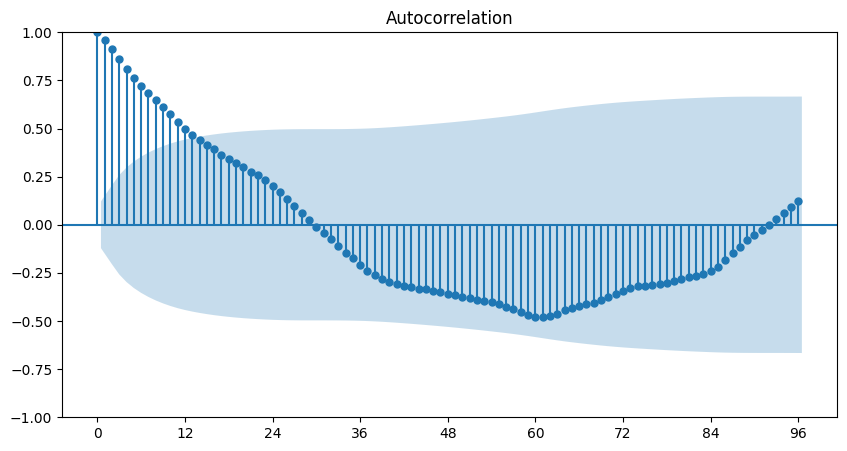

In [364]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rc("figure", figsize=(10,5))
plot_acf(df.y, lags=96)
plt.xticks(range(0, 97, 12))
plt.show()

In [365]:
from coreforecast.seasonal import find_season_length
find_season_length(df.y.values, max_season_length=100)

0

In [366]:
from statsmodels.tsa.stattools import kpss
kpss(df.y)

<ipython-input-366-6aa4b0438ce6>:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss(df.y)


(0.21176165015241966,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

**KPSS test shows that the data is stationary, we don't need box cox transformation but let's apply and see if it makes any changes**

In [367]:
from coreforecast.scalers import boxcox

In [368]:
from coreforecast.scalers import boxcox_lambda
best_lambda = boxcox_lambda(df.y.values, method='guerrero', season_length=12)
print(best_lambda)

-0.5998529898121915


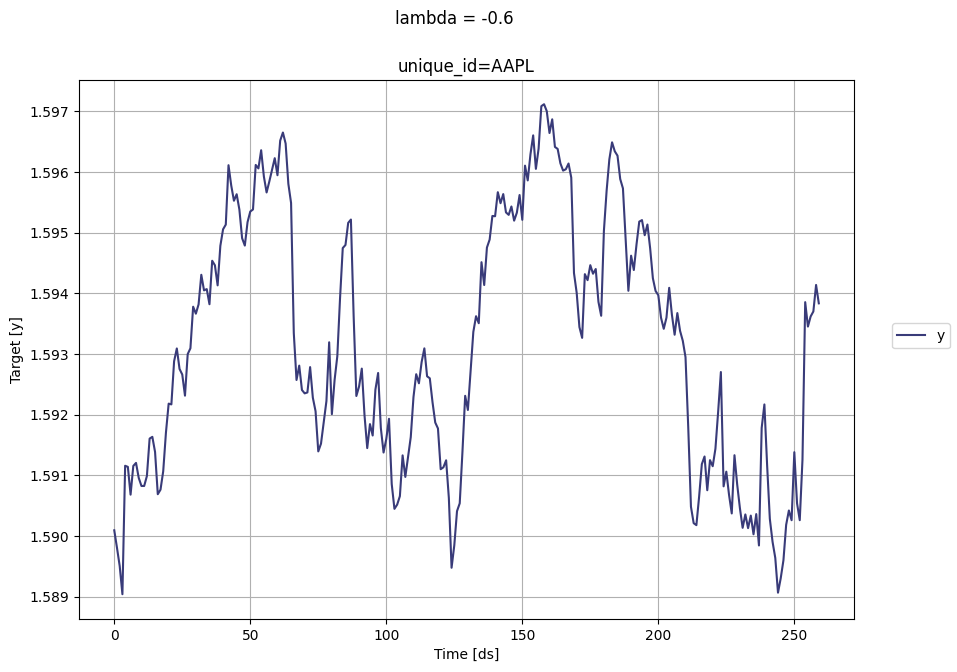

In [369]:
df_transformed = df.copy()
df_transformed.y = boxcox(df_transformed.y.values, best_lambda)

f = StatsForecast.plot(df_transformed)
f.set_figwidth(10)
f.set_figheight(7)
f.suptitle('lambda = ' + str(round(best_lambda, 3)))
f

In [371]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#212946',
    'axes.facecolor': '#212946',
    'savefig.facecolor':'#212946',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False,
    'grid.color': '#2A3459',
    'grid.linewidth': '1',
    'text.color': '0.9',
    'axes.labelcolor': '0.9',
    'xtick.color': '0.9',
    'ytick.color': '0.9',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (18,7)


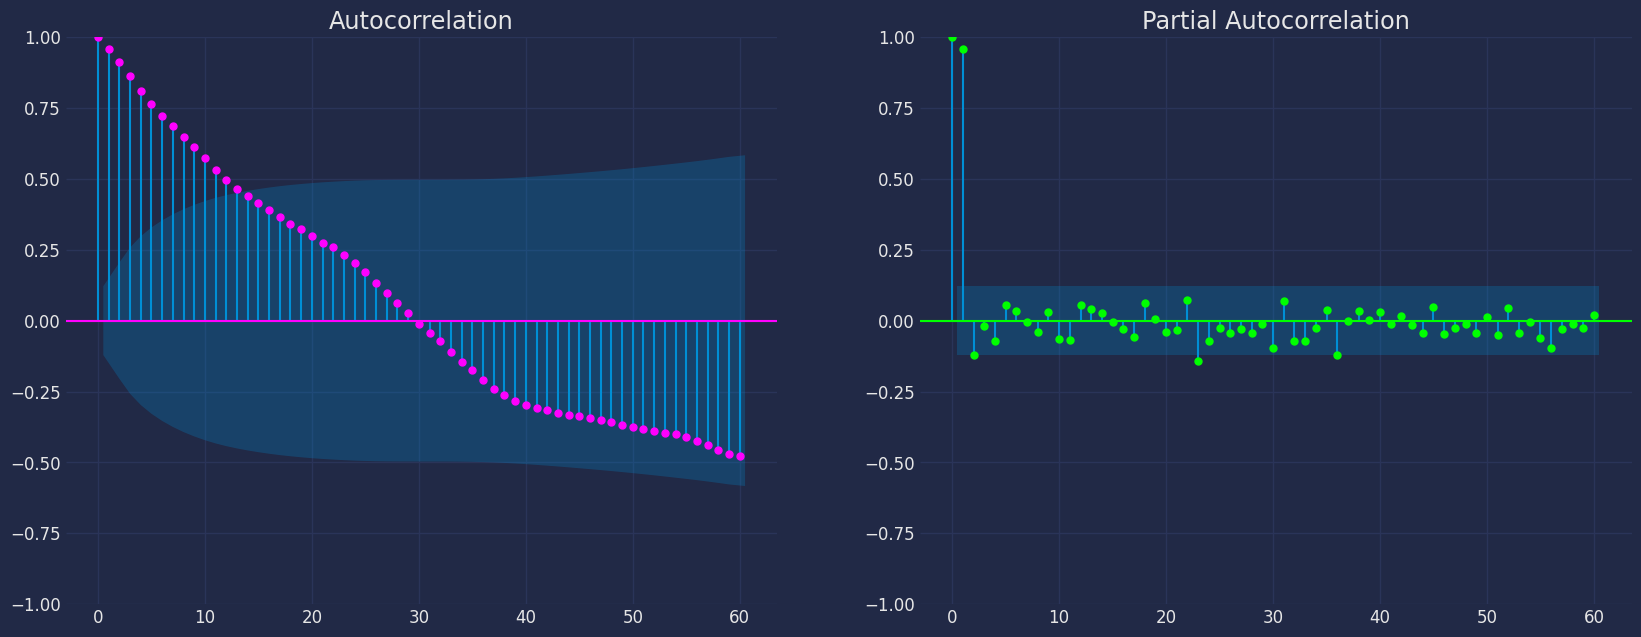

In [372]:
fig, axs = plt.subplots(nrows=1, ncols=2)

plot_acf(df["y"],  lags=60, ax=axs[0],color="fuchsia")
axs[0].set_title("Autocorrelation");

plot_pacf(df["y"],  lags=60, ax=axs[1],color="lime")
axs[1].set_title('Partial Autocorrelation')

plt.show();

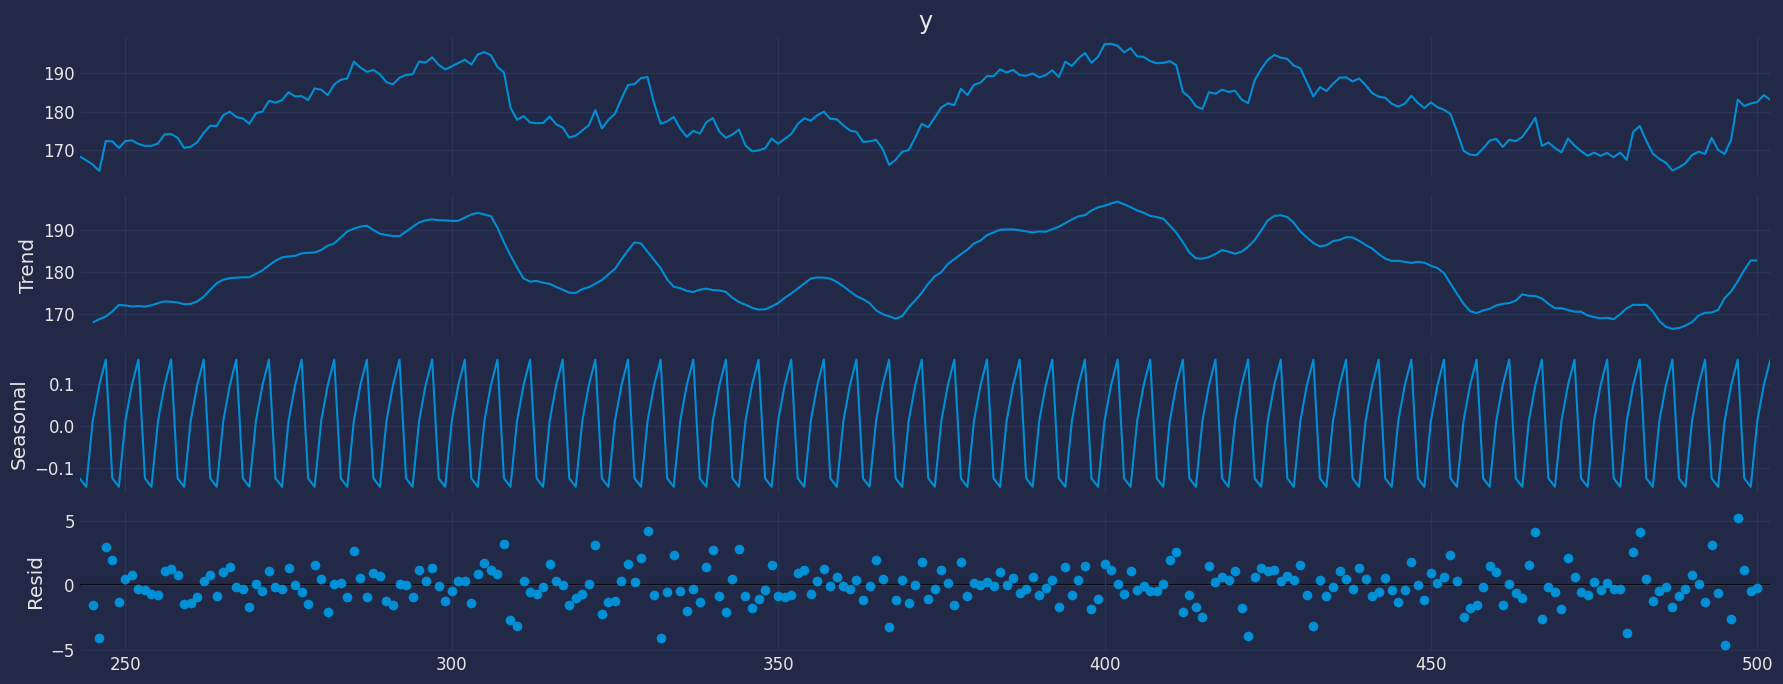

In [373]:
from statsmodels.tsa.seasonal import seasonal_decompose
a = seasonal_decompose(df["y"], model = "add", period=5)
a.plot();

In [374]:
Y_train_df = df[df.ds<=245]
Y_test_df = df[df.ds>245]


In [375]:
Y_train_df.shape, Y_test_df.shape


((246, 3), (14, 3))

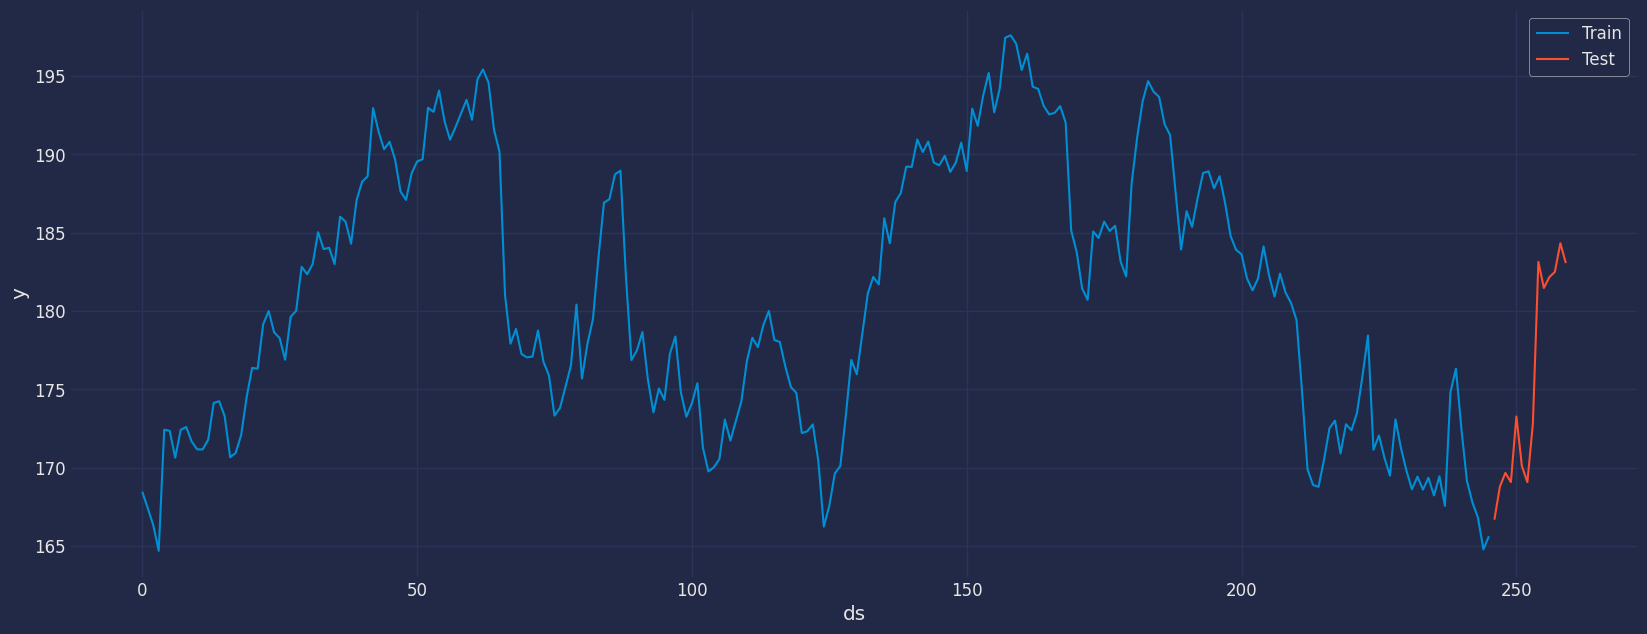

In [376]:
sns.lineplot(Y_train_df,x="ds", y="y", label="Train")
sns.lineplot(Y_test_df, x="ds", y="y", label="Test")
plt.show()

In [377]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from statsforecast.arima import arima_string


In [378]:
season_length = 5
horizon = len(Y_test_df)

models = [AutoARIMA(season_length=season_length)]


In [379]:
sf = StatsForecast(df=Y_train_df,
                   models=models,
                   freq=1,
                   n_jobs=-1)


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


In [380]:
sf.fit()


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


StatsForecast(models=[AutoARIMA])

In [381]:
StatsForecast(models=[AutoARIMA],freq = 5)


StatsForecast(models=[<class 'statsforecast.models.AutoARIMA'>])

In [382]:
arima_string(sf.fitted_[0,0].model_)
# Parameters of ARIMA model

'ARIMA(1,0,1)(0,0,2)[5] with zero mean    '

In [383]:
result=sf.fitted_[0,0].model_
print(result.keys())
print(result['arma'])


dict_keys(['coef', 'sigma2', 'var_coef', 'mask', 'loglik', 'aic', 'arma', 'residuals', 'code', 'n_cond', 'nobs', 'model', 'bic', 'aicc', 'ic', 'xreg', 'x', 'lambda'])
(1, 1, 0, 2, 5, 0, 0)


In [384]:
residual=pd.DataFrame(result.get("residuals"), columns=["residual Model"])
residual


,residual Model
0,2.204343
1,-1.015143
2,-0.950128
3,-1.518795
4,7.851129
...,...
241,-2.647296
242,-1.223957
243,-0.339587
244,-2.029270


In [416]:
# The residual mean is almost zero
residual.mean()

residual Model    0.017825
dtype: float64

<ipython-input-385-5ef7d9432844>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual, ax=axs[0,1]);


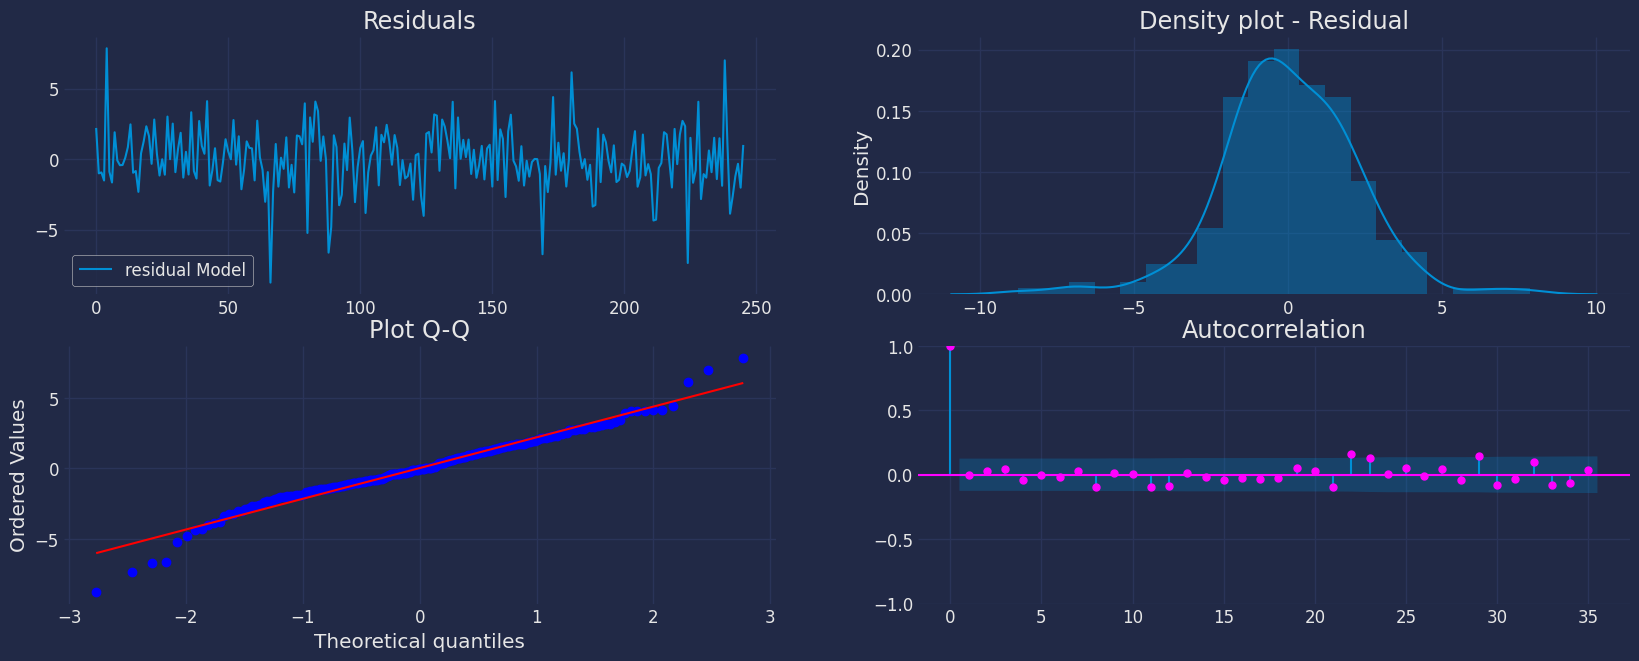

In [385]:
from scipy import stats

fig, axs = plt.subplots(nrows=2, ncols=2)

# plot[1,1]
residual.plot(ax=axs[0,0])
axs[0,0].set_title("Residuals");

# plot
sns.distplot(residual, ax=axs[0,1]);
axs[0,1].set_title("Density plot - Residual");

# plot
stats.probplot(residual["residual Model"], dist="norm", plot=axs[1,0])
axs[1,0].set_title('Plot Q-Q')

# plot
plot_acf(residual,  lags=35, ax=axs[1,1],color="fuchsia")
axs[1,1].set_title("Autocorrelation");

plt.show();


In [386]:
Y_hat_df = sf.forecast(horizon, fitted=True)

Y_hat_df.head()


/usr/local/lib/python3.10/dist-packages/statsforecast/core.py:399: FutureWarning: The `df` argument of the StatsForecast constructor as well as reusing stored dfs from other methods is deprecated and will raise an error in a future version. Please provide the `df` argument to the corresponding method instead, e.g. fit/forecast.
  warnings.warn(


,unique_id,ds,AutoARIMA
0,AAPL,246,166.013351
1,AAPL,247,165.891403
2,AAPL,248,166.625900
3,AAPL,249,166.920761
4,AAPL,250,166.455582


In [387]:
values=sf.forecast_fitted_values()
values


,unique_id,ds,y,AutoARIMA
0,AAPL,0,168.461090,166.256744
1,AAPL,1,167.418060,168.433197
2,AAPL,2,166.335342,167.285477
3,AAPL,3,164.686371,166.205170
4,AAPL,4,172.414627,164.563492
...,...,...,...,...
241,AAPL,241,169.150574,171.797867
242,AAPL,242,167.772446,168.996399
243,AAPL,243,166.813736,167.153320
244,AAPL,244,164.776505,166.805771


In [388]:
Y_hat_df

,unique_id,ds,AutoARIMA
0,AAPL,246,166.013351
1,AAPL,247,165.891403
2,AAPL,248,166.625900
3,AAPL,249,166.920761
4,AAPL,250,166.455582
5,AAPL,251,166.102905
6,AAPL,252,165.922531
7,AAPL,253,165.853058
8,AAPL,254,165.612686
9,AAPL,255,165.677536


In [389]:
Y_hat_df=Y_hat_df.reset_index()
Y_hat_df


,index,unique_id,ds,AutoARIMA
0,0,AAPL,246,166.013351
1,1,AAPL,247,165.891403
2,2,AAPL,248,166.625900
3,3,AAPL,249,166.920761
4,4,AAPL,250,166.455582
5,5,AAPL,251,166.102905
6,6,AAPL,252,165.922531
7,7,AAPL,253,165.853058
8,8,AAPL,254,165.612686
9,9,AAPL,255,165.677536


In [390]:
Y_test_df

,unique_id,ds,y
489,AAPL,246,166.673920
490,AAPL,247,168.791061
491,AAPL,248,169.659882
492,AAPL,249,169.070679
493,AAPL,250,173.264984
494,AAPL,251,170.099289
495,AAPL,252,169.070679
496,AAPL,253,172.795624
497,AAPL,254,183.131607
498,AAPL,255,181.463882


In [391]:
Y_hat_df

,index,unique_id,ds,AutoARIMA
0,0,AAPL,246,166.013351
1,1,AAPL,247,165.891403
2,2,AAPL,248,166.625900
3,3,AAPL,249,166.920761
4,4,AAPL,250,166.455582
5,5,AAPL,251,166.102905
6,6,AAPL,252,165.922531
7,7,AAPL,253,165.853058
8,8,AAPL,254,165.612686
9,9,AAPL,255,165.677536


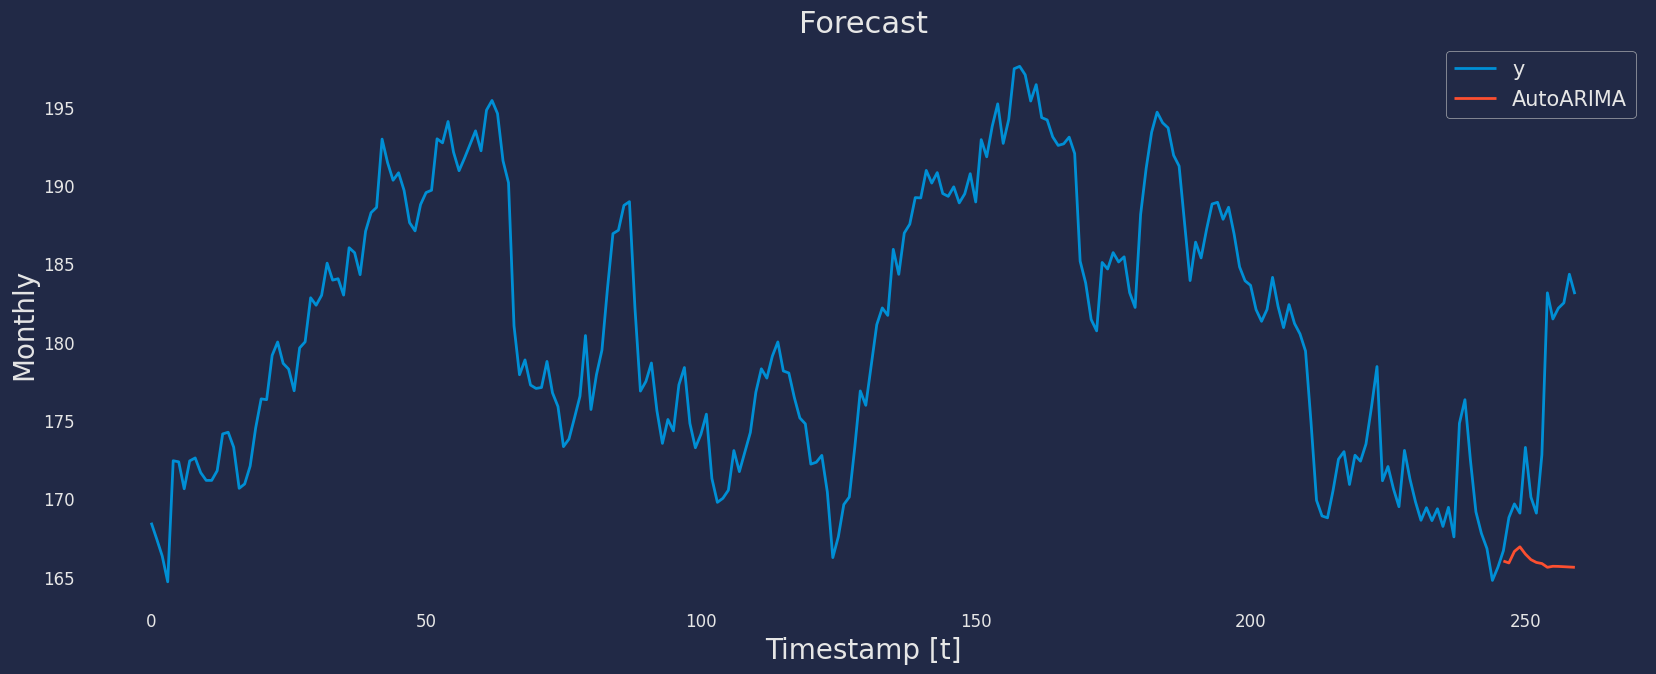

In [392]:
Y_hat_df = Y_test_df.merge(Y_hat_df, how='left', on=['unique_id', 'ds'])

fig, ax = plt.subplots(1, 1, figsize=(18, 7))
plot_df = pd.concat([Y_train_df, Y_hat_df]).set_index('ds')
plot_df[['y', 'AutoARIMA']].plot(ax=ax, linewidth=2)
ax.set_title('Forecast', fontsize=22)
ax.set_ylabel('Monthly', fontsize=20)
ax.set_xlabel('Timestamp [t]', fontsize=20)
ax.legend(prop={'size': 15})
ax.grid()

plt.show()

In [393]:
sf.predict(h=29)

,unique_id,ds,AutoARIMA
0,AAPL,246,166.013351
1,AAPL,247,165.891403
2,AAPL,248,166.625900
3,AAPL,249,166.920761
4,AAPL,250,166.455582
5,AAPL,251,166.102905
6,AAPL,252,165.922531
7,AAPL,253,165.853058
8,AAPL,254,165.612686
9,AAPL,255,165.677536


In [394]:
forecast_df_arima = sf.predict(h=28, level = [80, 95])

forecast_df_test = forecast_df_arima[:14]
forecast_df_future_arima = forecast_df_arima[14:]

In [395]:
df_plot=pd.concat([df, forecast_df_test]).set_index('ds')
df_plot

,unique_id,y,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-lo-80,AutoARIMA-hi-80,AutoARIMA-hi-95
ds,,,,,,,
0,AAPL,168.461090,NaN,NaN,NaN,NaN,NaN
1,AAPL,167.418060,NaN,NaN,NaN,NaN,NaN
2,AAPL,166.335342,NaN,NaN,NaN,NaN,NaN
3,AAPL,164.686371,NaN,NaN,NaN,NaN,NaN
4,AAPL,172.414627,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
255,AAPL,NaN,165.677536,151.076767,156.130600,175.224472,180.278305
256,AAPL,NaN,165.669708,150.241013,155.581421,175.757980,181.098404
257,AAPL,NaN,165.650513,149.421097,155.038666,176.262360,181.879944


<ipython-input-396-1251916fe0c7>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(df_plot['AutoARIMA'], 'b-',  color="red", linewidth=2, label="AutoArima")


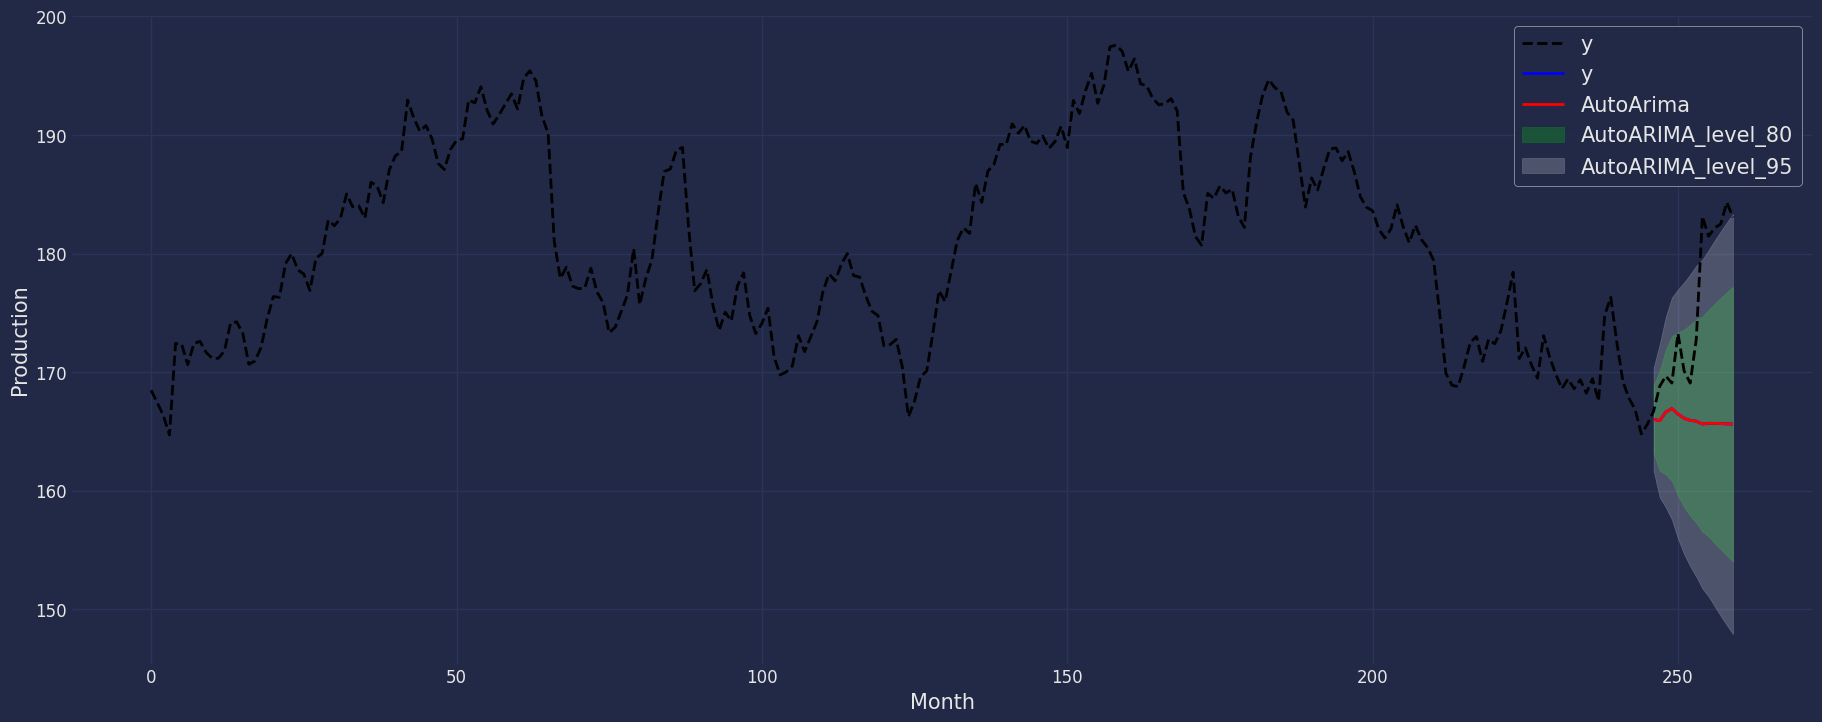

In [396]:
fig, ax = plt.subplots(1, 1, figsize = (20, 8))

plt.plot(df_plot['y'], 'k--', df_plot['AutoARIMA'], 'b-', linewidth=2 ,label="y")
plt.plot(df_plot['AutoARIMA'], 'b-',  color="red", linewidth=2, label="AutoArima")

# Specify graph features:
ax.fill_between(df_plot.index,
                df_plot['AutoARIMA-lo-80'],
                df_plot['AutoARIMA-hi-80'],
                alpha=.20,
                color='lime',
                label='AutoARIMA_level_80')
ax.fill_between(df_plot.index,
                df_plot['AutoARIMA-lo-95'],
                df_plot['AutoARIMA-hi-95'],
                alpha=.2,
                color='white',
                label='AutoARIMA_level_95')
ax.set_title('', fontsize=20)
ax.set_ylabel('Production', fontsize=15)
ax.set_xlabel('Month', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()


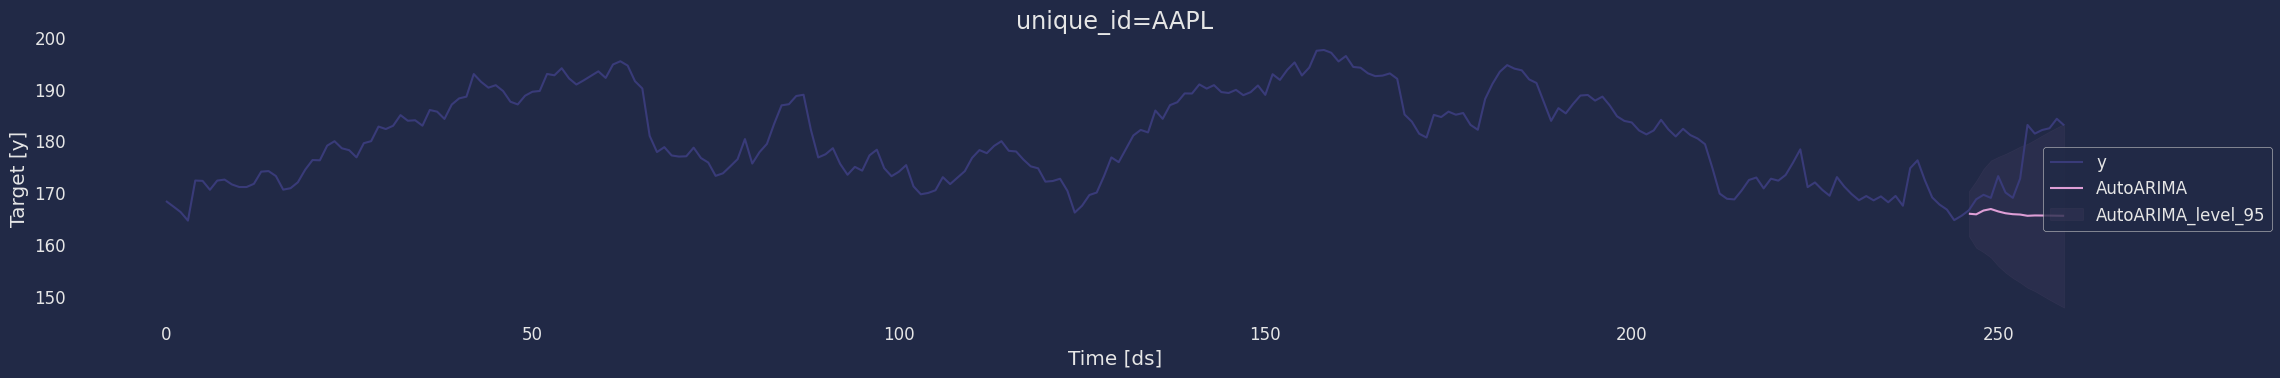

In [397]:
sf.plot(df, forecast_df_test, level=[95])


In [398]:
crossvalidation_df = sf.cross_validation(df=Y_train_df,
                                         h=15,
                                         step_size=15,
                                         n_windows=5)


In [399]:
crossvalidation_df


,unique_id,ds,cutoff,y,AutoARIMA
0,AAPL,171,170,181.432098,183.765930
1,AAPL,172,170,180.703995,183.765930
2,AAPL,173,170,185.072495,183.765930
3,AAPL,174,170,184.653595,183.765930
4,AAPL,175,170,185.700851,183.765930
...,...,...,...,...,...
70,AAPL,241,230,169.150574,169.718872
71,AAPL,242,230,167.772446,169.711533
72,AAPL,243,230,166.813736,169.704193
73,AAPL,244,230,164.776505,169.696838


In [400]:
 %%capture
%pip install datasetsforecast


In [401]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape
rmse = rmse(crossvalidation_df['y'], crossvalidation_df["AutoARIMA"])
print("RMSE using cross-validation: ", rmse)


RMSE using cross-validation:  5.673202


In [402]:
from datasetsforecast.losses import mae, mape, mase, rmse, smape
from sklearn.metrics import r2_score

def evaluate_performance(y_hist, y_true, model):
    evaluation = {}
    evaluation[model] = {}
    metrics = {
        'mase': mase,
        'mae': mae,
        'mape': mape,
        'rmse': rmse,
        'smape': smape,
        'r2_score': r2_score
    }

    for metric_name, metric_func in metrics.items():
        if metric_name == 'mase':
            evaluation[model][metric_name] = metric_func(y_true['y'].values,
                                                         y_true[model].values,
                                                         y_hist['y'].values,
                                                         seasonality=5)
        elif metric_name == 'r2_score':
            evaluation[model][metric_name] = metric_func(y_true['y'].values, y_true[model].values)
        else:
            evaluation[model][metric_name] = metric_func(y_true['y'].values, y_true[model].values)

    return pd.DataFrame(evaluation).T

evaluate_performance(Y_train_df, Y_hat_df, model='AutoARIMA')


,mae,mape,mase,r2_score,rmse,smape
AutoARIMA,9.456971,5.253047,2.22798,-2.164808,11.67395,5.468467


** Auto Arima result is not sattisfying!**

In [403]:
from statsforecast.models import HistoricAverage, Naive, SeasonalNaive, RandomWalkWithDrift, WindowAverage, SeasonalWindowAverage

In [404]:
Y_train_df

,unique_id,ds,y
243,AAPL,0,168.461090
244,AAPL,1,167.418060
245,AAPL,2,166.335342
246,AAPL,3,164.686371
247,AAPL,4,172.414627
...,...,...,...
484,AAPL,241,169.150574
485,AAPL,242,167.772446
486,AAPL,243,166.813736
487,AAPL,244,164.776505


In [405]:
sf = StatsForecast(
    models = [HistoricAverage(), Naive(), SeasonalNaive(season_length=5), RandomWalkWithDrift(),
              WindowAverage(window_size=5, alias='WindowAverage5'),
              WindowAverage(window_size=10, alias='WindowAverage10'),
              WindowAverage(window_size=15, alias='WindowAverage15'),
              SeasonalWindowAverage(season_length=5, window_size=2, alias='SeasWA2'),
              SeasonalWindowAverage(season_length=5, window_size=3, alias='SeasWA3'),
              SeasonalWindowAverage(season_length=5, window_size=4, alias='SeasWA4')],
    freq = 1
)

sf.fit(Y_train_df)
forecast_df_basic = sf.predict(h=28)
forecast_df_basic_test =forecast_df_basic[:14]
forecast_df_basic_future =forecast_df_basic[14:]


In [406]:
forecast_df_basic_test

,unique_id,ds,HistoricAverage,Naive,SeasonalNaive,RWD,WindowAverage5,WindowAverage10,WindowAverage15,SeasWA2,SeasWA3,SeasWA4
0,AAPL,246,180.892426,165.615356,169.150574,165.603745,166.825729,169.469131,169.259094,169.295380,169.067352,169.455154
1,AAPL,247,180.892426,165.615356,167.772446,165.592133,166.825729,169.469131,169.259094,167.662598,168.248459,168.556381
2,AAPL,248,180.892426,165.615356,166.813736,165.580505,166.825729,169.469131,169.259094,170.808319,170.069321,170.820801
3,AAPL,249,180.892426,165.615356,164.776505,165.568893,166.825729,169.469131,169.259094,170.543686,170.145889,170.421356
4,AAPL,250,180.892426,165.615356,165.615356,165.557281,166.825729,169.469131,169.259094,169.035721,168.764420,169.023239
5,AAPL,251,180.892426,165.615356,169.150574,165.545670,166.825729,169.469131,169.259094,169.295380,169.067352,169.455154
6,AAPL,252,180.892426,165.615356,167.772446,165.534042,166.825729,169.469131,169.259094,167.662598,168.248459,168.556381
7,AAPL,253,180.892426,165.615356,166.813736,165.522430,166.825729,169.469131,169.259094,170.808319,170.069321,170.820801
8,AAPL,254,180.892426,165.615356,164.776505,165.510818,166.825729,169.469131,169.259094,170.543686,170.145889,170.421356
9,AAPL,255,180.892426,165.615356,165.615356,165.499207,166.825729,169.469131,169.259094,169.035721,168.764420,169.023239


In [407]:
Y_test_df

,unique_id,ds,y
489,AAPL,246,166.673920
490,AAPL,247,168.791061
491,AAPL,248,169.659882
492,AAPL,249,169.070679
493,AAPL,250,173.264984
494,AAPL,251,170.099289
495,AAPL,252,169.070679
496,AAPL,253,172.795624
497,AAPL,254,183.131607
498,AAPL,255,181.463882


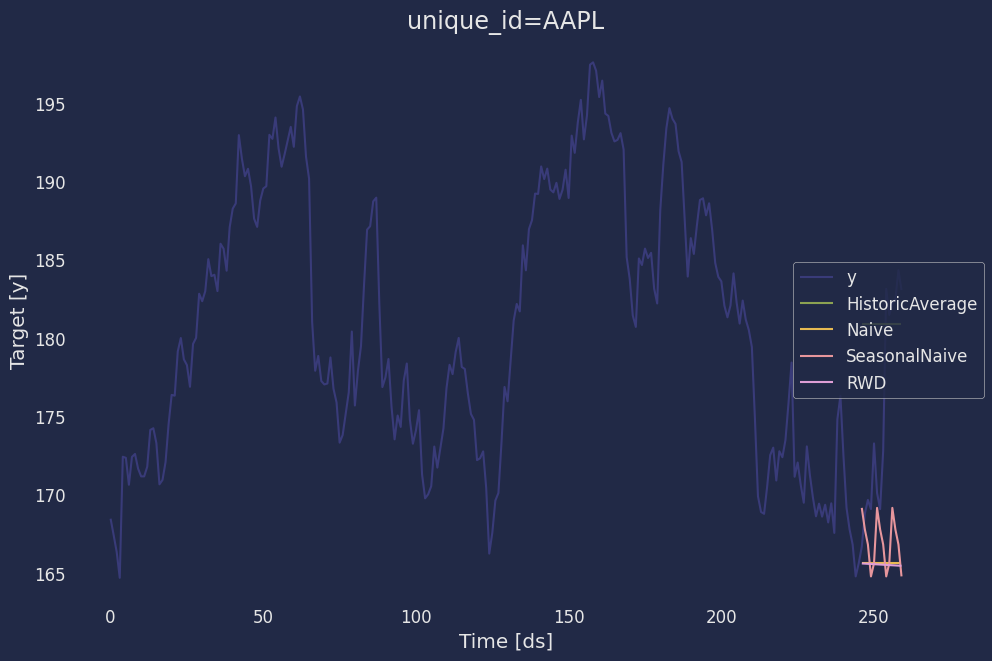

In [408]:
f = sf.plot(df, forecast_df_basic_test, models=['HistoricAverage', 'Naive', 'SeasonalNaive', 'RWD'])
f.set_figwidth(10)
f.set_figheight(7)
f

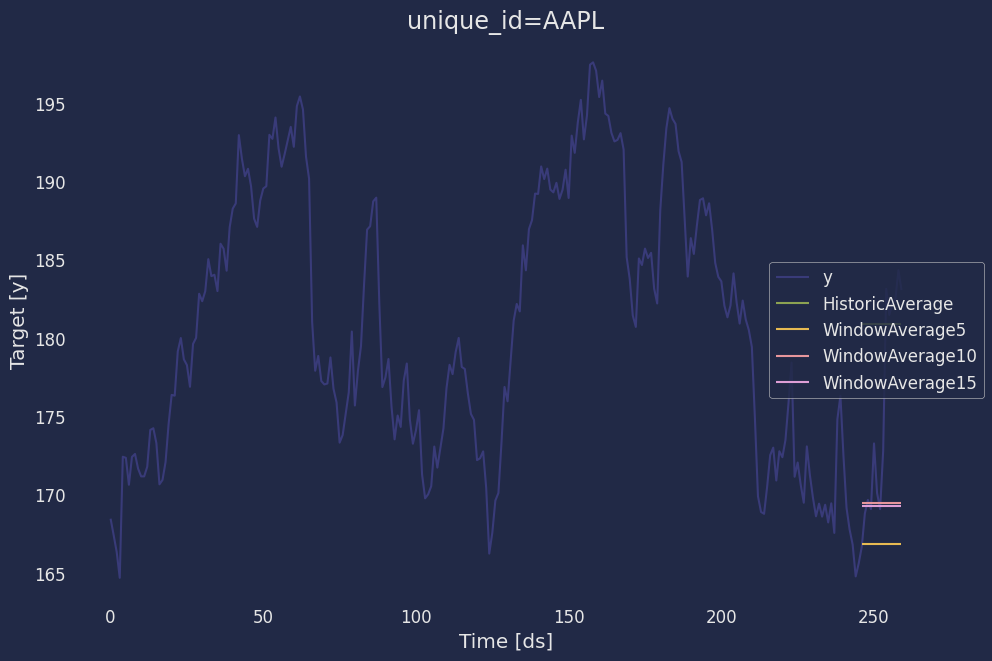

In [409]:
f = sf.plot(df, forecast_df_basic_test, models=['HistoricAverage', 'WindowAverage5', 'WindowAverage10', 'WindowAverage15'])
f.set_figwidth(10)
f.set_figheight(7)
f

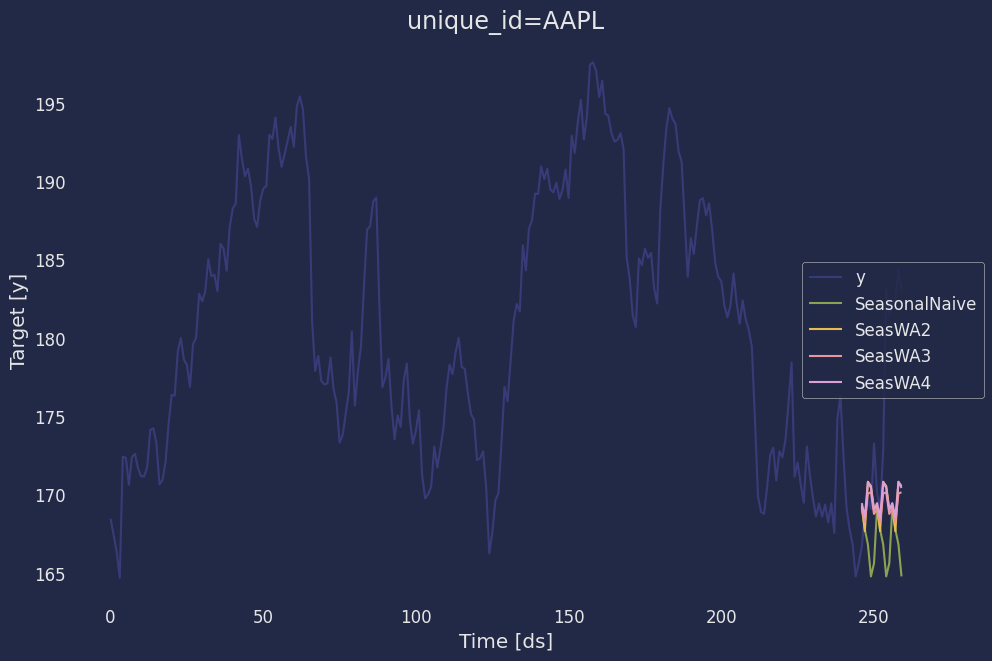

In [410]:
f = sf.plot(df, forecast_df_basic_test, models=['SeasonalNaive', 'SeasWA2', 'SeasWA3', 'SeasWA4'])
f.set_figwidth(10)
f.set_figheight(7)
f

In [411]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_true = Y_test_df['y']

y_train = Y_train_df['y'].values

models = forecast_df_basic_test.columns[2:]
results = pd.DataFrame(index=models, columns=['mae','rmse', 'r2_score'])

for model in models:
    y_pred = forecast_df_basic_test[model]
    results.loc[model, 'mae'] = mean_absolute_error(y_true, y_pred)
    results.loc[model, 'rmse'] = np.sqrt(mean_squared_error(y_true, y_pred))
    results.loc[model, 'r2_score'] = r2_score(y_true, y_pred)

print(results)


                      mae       rmse  r2_score
HistoricAverage   7.06926   8.537343 -0.692611
Naive            9.815859  11.807307 -2.237527
SeasonalNaive    8.872845   11.16376 -1.894228
RWD              9.902974  11.903452 -2.290467
WindowAverage5   8.627173  10.822006 -1.719739
WindowAverage10  6.572111   8.866107 -0.825483
WindowAverage15  6.662127    9.00869 -0.884669
SeasWA2          6.680103   8.755527 -0.780231
SeasWA3          6.690806   8.905869 -0.841893
SeasWA4          6.486795    8.64793 -0.736745


**The best result if from SeasonalWindowAverage model but as it doesn't have interval forecasting, I will go with historical average!**

In [412]:
sfh = StatsForecast( models=[HistoricAverage()], freq=1)


sfh.fit(Y_train_df)
yhat_historicAverage = sfh.predict(h= 28,level = [80, 95])
yhat_historicAverage_test=yhat_historicAverage[:14]
yhat_historicAverage_forecast=yhat_historicAverage[14:]


In [413]:
yhat_historicAverage_test

,unique_id,ds,HistoricAverage,HistoricAverage-lo-80,HistoricAverage-lo-95,HistoricAverage-hi-80,HistoricAverage-hi-95
0,AAPL,246,180.892426,169.929092,164.125443,191.855759,197.659409
1,AAPL,247,180.892426,169.929092,164.125443,191.855759,197.659409
2,AAPL,248,180.892426,169.929092,164.125443,191.855759,197.659409
3,AAPL,249,180.892426,169.929092,164.125443,191.855759,197.659409
4,AAPL,250,180.892426,169.929092,164.125443,191.855759,197.659409
5,AAPL,251,180.892426,169.929092,164.125443,191.855759,197.659409
6,AAPL,252,180.892426,169.929092,164.125443,191.855759,197.659409
7,AAPL,253,180.892426,169.929092,164.125443,191.855759,197.659409
8,AAPL,254,180.892426,169.929092,164.125443,191.855759,197.659409
9,AAPL,255,180.892426,169.929092,164.125443,191.855759,197.659409


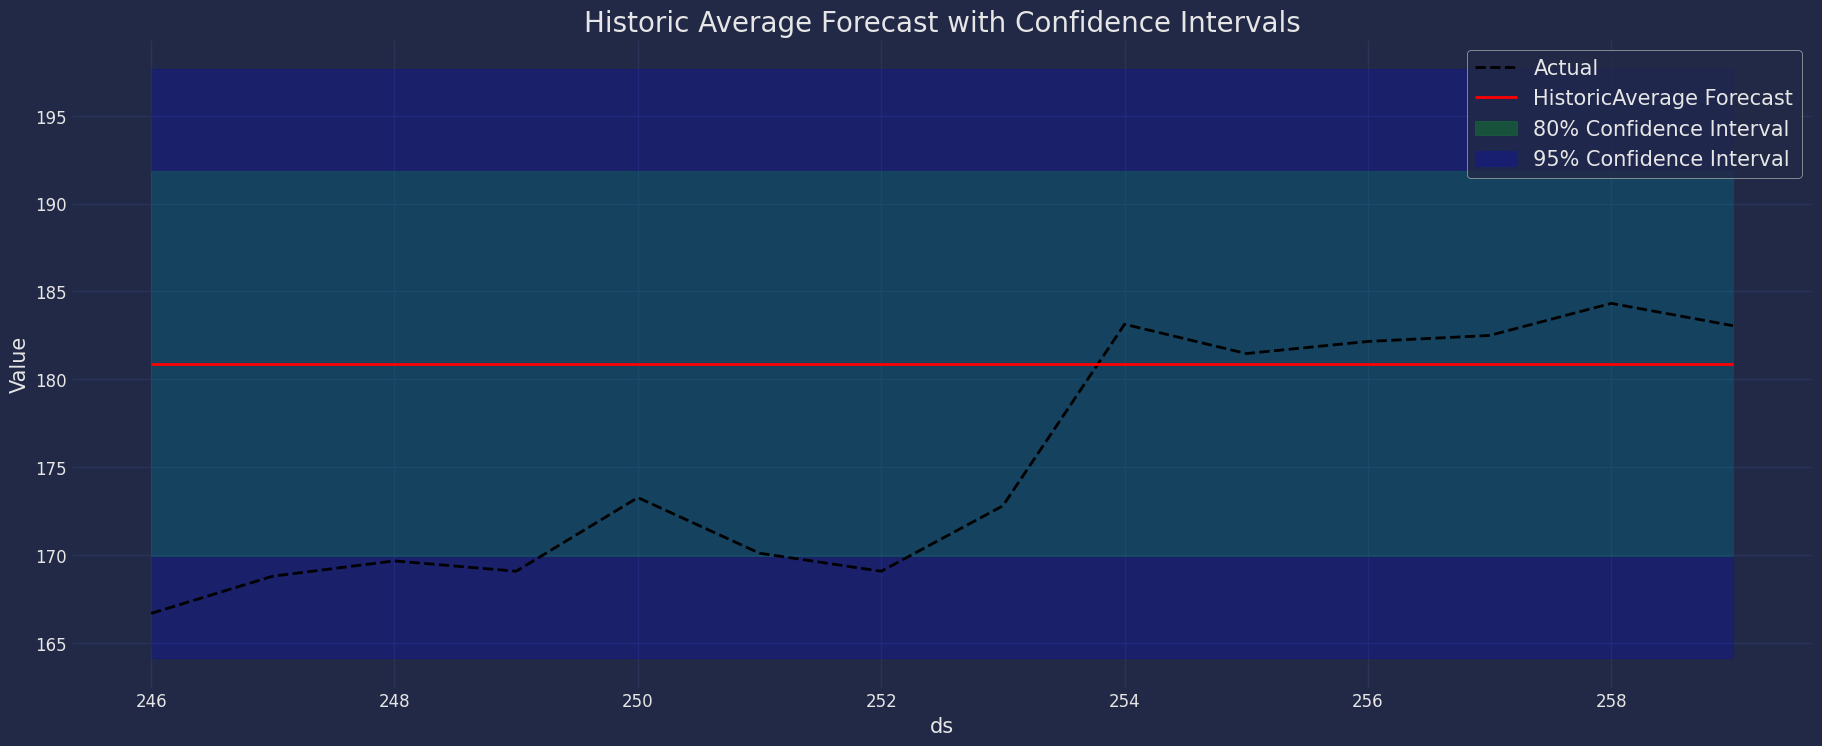

In [414]:

fig, ax = plt.subplots(1, 1, figsize=(20, 8))

plt.plot(Y_test_df['ds'], Y_test_df['y'], 'k--', label="Actual", linewidth=2)
plt.plot(yhat_historicAverage_test['ds'], yhat_historicAverage_test['HistoricAverage'], color="red", label="HistoricAverage Forecast", linewidth=2)

ax.fill_between(yhat_historicAverage_test['ds'],
                yhat_historicAverage_test['HistoricAverage-lo-80'],
                yhat_historicAverage_test['HistoricAverage-hi-80'],
                alpha=0.20, color='lime', label='80% Confidence Interval')

ax.fill_between(yhat_historicAverage_test['ds'],
                yhat_historicAverage_test['HistoricAverage-lo-95'],
                yhat_historicAverage_test['HistoricAverage-hi-95'],
                alpha=0.2, color='blue', label='95% Confidence Interval')

ax.set_title('Historic Average Forecast with Confidence Intervals', fontsize=20)
ax.set_ylabel('Value', fontsize=15)
ax.set_xlabel('ds', fontsize=15)
ax.legend(prop={'size': 15})
ax.grid(True)
plt.show()

The best result !

In [415]:
yhat_historicAverage_forecast

,unique_id,ds,HistoricAverage,HistoricAverage-lo-80,HistoricAverage-lo-95,HistoricAverage-hi-80,HistoricAverage-hi-95
14,AAPL,260,180.892426,169.929092,164.125443,191.855759,197.659409
15,AAPL,261,180.892426,169.929092,164.125443,191.855759,197.659409
16,AAPL,262,180.892426,169.929092,164.125443,191.855759,197.659409
17,AAPL,263,180.892426,169.929092,164.125443,191.855759,197.659409
18,AAPL,264,180.892426,169.929092,164.125443,191.855759,197.659409
19,AAPL,265,180.892426,169.929092,164.125443,191.855759,197.659409
20,AAPL,266,180.892426,169.929092,164.125443,191.855759,197.659409
21,AAPL,267,180.892426,169.929092,164.125443,191.855759,197.659409
22,AAPL,268,180.892426,169.929092,164.125443,191.855759,197.659409
23,AAPL,269,180.892426,169.929092,164.125443,191.855759,197.659409
